In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import torch 
import numpy as np



In [3]:
df = pd.read_csv('D:/Dataset/anggapurnama/twitter-dataset-ppkm/versions/2/INA_TweetsPPKM_Labeled_Pure.csv',
    sep= None,
    engine= 'python')

In [4]:
df['sentiment'].unique()

array([1, 2, 0], dtype=int64)

In [5]:
df[df['sentiment'] == 2]

,Date,User,Tweet,sentiment
33,2022-03-26 04:51:44+00:00,CendekiaDelapan,Karena stimulasi untuk #anakberkebutuhankhusus...,2
52,2022-03-22 17:10:09+00:00,ViantAntony,Ye ampun mbh anda seorang Wapres loh.&amp;Gela...,2
59,2022-03-22 13:10:19+00:00,mtaufikmJKT48,Mulaik kumat lagi. 😀 #ppkm https://t.co/MNDSPH...,2
72,2022-03-22 07:43:24+00:00,PunditPintar,"Welcome PPKM bau bau naik level nih, gimana ni...",2
73,2022-03-22 07:30:34+00:00,PYI_Indonesia,"Sesungguhnya Allah tidak menciptakan kita, ham...",2
...,...,...,...,...
23579,2021-01-08 12:21:23+00:00,Andreyuris,Apa cuma saya yang bingung dengan penjelasan M...,2
23607,2021-01-08 00:10:41+00:00,domabby1,Bingung sama pemerintah @jokowi slogan dan nam...,2
23610,2021-01-07 19:39:10+00:00,rustu80,Sosial distancing\nPhisical distancing\nPSBB\n...,2
23611,2021-01-07 19:24:11+00:00,Yookrahwah,Dari #PSBB jadi #ppkm. Semakin banyaknya istil...,2


In [6]:
df

,Date,User,Tweet,sentiment
0,2022-03-31 14:32:04+00:00,pikobar_jabar,Ketahui informasi pembagian #PPKM di wilayah J...,1
1,2022-03-31 09:26:00+00:00,inewsdotid,Tempat Ibadah di Wilayah PPKM Level 1 Boleh Be...,1
2,2022-03-31 05:02:34+00:00,vdvc_talk,"Juru bicara Satgas Covid-19, Wiku Adisasmito m...",1
3,2022-03-30 14:23:10+00:00,pikobar_jabar,Ketahui informasi pembagian #PPKM di wilayah J...,1
4,2022-03-30 11:28:57+00:00,tvOneNews,Kementerian Agama menerbitkan Surat Edaran Nom...,1
...,...,...,...,...
23639,2020-06-26 18:34:56+00:00,bananabluff,noelle loses a bet to akarsha and it somehow e...,1
23640,2020-06-19 15:14:07+00:00,Auqroix,they call her... weekeeshee...\n#butterflysoup...,1
23641,2020-06-18 23:45:26+00:00,Auqroix,"put out what you wanna see more of, amirite ga...",1
23642,2020-06-15 23:17:22+00:00,Auqroix,"i don't need anybody, i'm fine here on my own\...",1


In [7]:
df['Tweet'].duplicated().sum()

158

In [8]:
df = df.drop_duplicates(subset= 'Tweet')

In [9]:
df.duplicated().sum()

0

In [10]:
df['Tweet']

0        Ketahui informasi pembagian #PPKM di wilayah J...
1        Tempat Ibadah di Wilayah PPKM Level 1 Boleh Be...
2        Juru bicara Satgas Covid-19, Wiku Adisasmito m...
3        Ketahui informasi pembagian #PPKM di wilayah J...
4        Kementerian Agama menerbitkan Surat Edaran Nom...
                               ...                        
23639    noelle loses a bet to akarsha and it somehow e...
23640    they call her... weekeeshee...\n#butterflysoup...
23641    put out what you wanna see more of, amirite ga...
23642    i don't need anybody, i'm fine here on my own\...
23643    Selamat Siang sahabat online, nih aku sedikit ...
Name: Tweet, Length: 23486, dtype: object

In [11]:
df['Tweet'].duplicated().sum()

0

In [12]:
df.isna().sum()

Date         0
User         0
Tweet        0
sentiment    0
dtype: int64

In [13]:
df.isnull().sum()

Date         0
User         0
Tweet        0
sentiment    0
dtype: int64

In [14]:
df['sentiment'].value_counts()

sentiment
1    17598
2     3945
0     1943
Name: count, dtype: int64

(array([ 1943.,     0., 17598.,     0.,  3945.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <BarContainer object of 5 artists>)

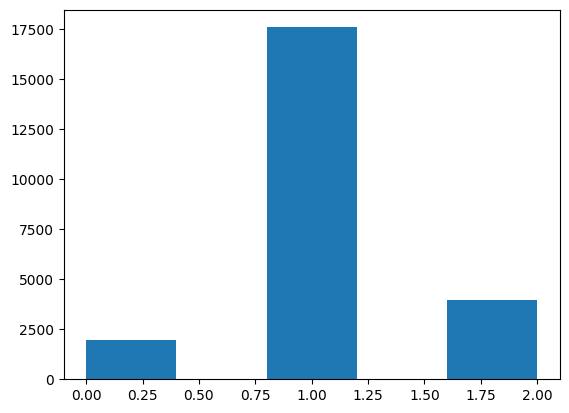

In [15]:
plt.hist(df['sentiment'], bins= 5)

In [16]:
df = df.drop('User', axis= 1)

In [17]:
df

,Date,Tweet,sentiment
0,2022-03-31 14:32:04+00:00,Ketahui informasi pembagian #PPKM di wilayah J...,1
1,2022-03-31 09:26:00+00:00,Tempat Ibadah di Wilayah PPKM Level 1 Boleh Be...,1
2,2022-03-31 05:02:34+00:00,"Juru bicara Satgas Covid-19, Wiku Adisasmito m...",1
3,2022-03-30 14:23:10+00:00,Ketahui informasi pembagian #PPKM di wilayah J...,1
4,2022-03-30 11:28:57+00:00,Kementerian Agama menerbitkan Surat Edaran Nom...,1
...,...,...,...
23639,2020-06-26 18:34:56+00:00,noelle loses a bet to akarsha and it somehow e...,1
23640,2020-06-19 15:14:07+00:00,they call her... weekeeshee...\n#butterflysoup...,1
23641,2020-06-18 23:45:26+00:00,"put out what you wanna see more of, amirite ga...",1
23642,2020-06-15 23:17:22+00:00,"i don't need anybody, i'm fine here on my own\...",1


In [18]:
df['Date'] = pd.to_datetime(df['Date'], utc = True)

In [19]:
kamus_slang = {
    "gk" : "tidak",
    "ga" : "tidak",
    "nggak" : "tidak",
    "yg" : "yang",
    "aku" : "saya",
    "gua" : "saya",
    "gue" : "saya",
    "gw" : "saya",
    "jan" : "jangan",
    "jgn" : "jangan",
    "bgt" : "sangat",
    "bet" :"sangat",
    "banget" : "sangat",
    "lu" : "kamu",
    "lo" : "kamu",
    "pls" : "tolong",
    "mantul" : "mantap",
    "guys" : "teman",
    "gak" : "tidak",
    "aje" : "saja",
    "aja" : "saja",
    "aj" : "aja",
    "sy" : "aku",
    "belom" : "belum",
    "blm" : "belum",
    "bae" : "baik",
    "tolol" : "bodoh",
    "anjing" : "bodoh",
    "gblk" : "bodoh",
    "goblok" : "bodoh",
    "bobo" : "tidur",
    "bobok" : "tidur",
    "capek" : "lelah",
    "cpk" : "lelah",
    "cape" : "lelah",
    "gitu" : "begitu",
    "gini" : "begini",
    "cpt" : "cepat",
    "cepet" : "cepat",
    "ngeh" : "mengerti",
    "planga plongo" : "bingung",
    "diem" : "diam",
    "dengerin" : "dengarkan",
    "loh" : "lah",
    "denger" : "dengar",
    "knp" : "kenapa",
    "napa" : "kenapa",
    "sape" : "siapa",
    
    
}

In [20]:
tweet_lower = df['Tweet'].str.lower()
tweet_lower

0        ketahui informasi pembagian #ppkm di wilayah j...
1        tempat ibadah di wilayah ppkm level 1 boleh be...
2        juru bicara satgas covid-19, wiku adisasmito m...
3        ketahui informasi pembagian #ppkm di wilayah j...
4        kementerian agama menerbitkan surat edaran nom...
                               ...                        
23639    noelle loses a bet to akarsha and it somehow e...
23640    they call her... weekeeshee...\n#butterflysoup...
23641    put out what you wanna see more of, amirite ga...
23642    i don't need anybody, i'm fine here on my own\...
23643    selamat siang sahabat online, nih aku sedikit ...
Name: Tweet, Length: 23486, dtype: object

In [21]:
df['Tweet'] = tweet_lower

In [22]:
df

,Date,Tweet,sentiment
0,2022-03-31 14:32:04+00:00,ketahui informasi pembagian #ppkm di wilayah j...,1
1,2022-03-31 09:26:00+00:00,tempat ibadah di wilayah ppkm level 1 boleh be...,1
2,2022-03-31 05:02:34+00:00,"juru bicara satgas covid-19, wiku adisasmito m...",1
3,2022-03-30 14:23:10+00:00,ketahui informasi pembagian #ppkm di wilayah j...,1
4,2022-03-30 11:28:57+00:00,kementerian agama menerbitkan surat edaran nom...,1
...,...,...,...
23639,2020-06-26 18:34:56+00:00,noelle loses a bet to akarsha and it somehow e...,1
23640,2020-06-19 15:14:07+00:00,they call her... weekeeshee...\n#butterflysoup...,1
23641,2020-06-18 23:45:26+00:00,"put out what you wanna see more of, amirite ga...",1
23642,2020-06-15 23:17:22+00:00,"i don't need anybody, i'm fine here on my own\...",1


In [23]:
import re

In [24]:
df['Tweet'] = df['Tweet'].str.split(r'[\s,.:;!?#/@]+')

In [25]:
df

,Date,Tweet,sentiment
0,2022-03-31 14:32:04+00:00,"[ketahui, informasi, pembagian, ppkm, di, wila...",1
1,2022-03-31 09:26:00+00:00,"[tempat, ibadah, di, wilayah, ppkm, level, 1, ...",1
2,2022-03-31 05:02:34+00:00,"[juru, bicara, satgas, covid-19, wiku, adisasm...",1
3,2022-03-30 14:23:10+00:00,"[ketahui, informasi, pembagian, ppkm, di, wila...",1
4,2022-03-30 11:28:57+00:00,"[kementerian, agama, menerbitkan, surat, edara...",1
...,...,...,...
23639,2020-06-26 18:34:56+00:00,"[noelle, loses, a, bet, to, akarsha, and, it, ...",1
23640,2020-06-19 15:14:07+00:00,"[they, call, her, weekeeshee, butterflysoup, p...",1
23641,2020-06-18 23:45:26+00:00,"[put, out, what, you, wanna, see, more, of, am...",1
23642,2020-06-15 23:17:22+00:00,"[i, don't, need, anybody, i'm, fine, here, on,...",1


In [26]:
def replace_slang_tokens(tokens, slang_dict):
    return [kamus_slang.get(token, token) for token in tokens]
df['Tweet'] = df['Tweet'].apply(lambda tokens : replace_slang_tokens(tokens, kamus_slang))

In [27]:
df[df['sentiment'] == 0]

,Date,Tweet,sentiment
35,2022-03-25 10:13:26+00:00,"[hadir, kembali, boss, mega, win, dari, https,...",0
44,2022-03-23 23:15:45+00:00,"[hayolohhhhhhhhh, seneng, kannnn, covid19, cor...",0
47,2022-03-23 10:29:52+00:00,"[thank, you, teman-teman, dari, saganheritageh...",0
51,2022-03-22 17:25:29+00:00,"[ruwet, ruwet, ruwet, inilah, negeri, ruwetnes...",0
78,2022-03-22 06:14:31+00:00,"[film, bagus, nih, karya, habaib, tonton, dah,...",0
...,...,...,...
23346,2021-01-12 01:48:45+00:00,"[, radioelshinta, heran, nih, kegiatan, di, ke...",0
23442,2021-01-11 04:07:04+00:00,"[yuk, siapkan, diri, kita, untuk, kenormalan, ...",0
23514,2021-01-09 08:18:36+00:00,"[masih, bisa, piknik, kok, tapi, tetep, taat, ...",0
23637,2020-10-25 04:02:45+00:00,"[, ppkm, himakifmipaunila, himaki2020, terampi...",0


In [28]:
df['Tweet'].duplicated().sum()

50

In [29]:
df['Tweet'] = df['Tweet'].apply(lambda tokens: [t for t in tokens if t.strip() != ''])


In [30]:
df['Tweet_str'] = df['Tweet'].apply(lambda tokens: ' '.join(tokens))


In [31]:
df

,Date,Tweet,sentiment,Tweet_str
0,2022-03-31 14:32:04+00:00,"[ketahui, informasi, pembagian, ppkm, di, wila...",1,ketahui informasi pembagian ppkm di wilayah ja...
1,2022-03-31 09:26:00+00:00,"[tempat, ibadah, di, wilayah, ppkm, level, 1, ...",1,tempat ibadah di wilayah ppkm level 1 boleh be...
2,2022-03-31 05:02:34+00:00,"[juru, bicara, satgas, covid-19, wiku, adisasm...",1,juru bicara satgas covid-19 wiku adisasmito me...
3,2022-03-30 14:23:10+00:00,"[ketahui, informasi, pembagian, ppkm, di, wila...",1,ketahui informasi pembagian ppkm di wilayah ja...
4,2022-03-30 11:28:57+00:00,"[kementerian, agama, menerbitkan, surat, edara...",1,kementerian agama menerbitkan surat edaran nom...
...,...,...,...,...
23639,2020-06-26 18:34:56+00:00,"[noelle, loses, a, sangat, to, akarsha, and, i...",1,noelle loses a sangat to akarsha and it someho...
23640,2020-06-19 15:14:07+00:00,"[they, call, her, weekeeshee, butterflysoup, p...",1,they call her weekeeshee butterflysoup ppkm ht...
23641,2020-06-18 23:45:26+00:00,"[put, out, what, you, wanna, see, more, of, am...",1,put out what you wanna see more of amirite gay...
23642,2020-06-15 23:17:22+00:00,"[i, don't, need, anybody, i'm, fine, here, on,...",1,i don't need anybody i'm fine here on my own b...


In [32]:
df['tahun'] = df['Date'].dt.year
df['bulan'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['hour'] = df['Date'].dt.hour



In [33]:
df

,Date,Tweet,sentiment,Tweet_str,tahun,bulan,day,hour
0,2022-03-31 14:32:04+00:00,"[ketahui, informasi, pembagian, ppkm, di, wila...",1,ketahui informasi pembagian ppkm di wilayah ja...,2022,3,31,14
1,2022-03-31 09:26:00+00:00,"[tempat, ibadah, di, wilayah, ppkm, level, 1, ...",1,tempat ibadah di wilayah ppkm level 1 boleh be...,2022,3,31,9
2,2022-03-31 05:02:34+00:00,"[juru, bicara, satgas, covid-19, wiku, adisasm...",1,juru bicara satgas covid-19 wiku adisasmito me...,2022,3,31,5
3,2022-03-30 14:23:10+00:00,"[ketahui, informasi, pembagian, ppkm, di, wila...",1,ketahui informasi pembagian ppkm di wilayah ja...,2022,3,30,14
4,2022-03-30 11:28:57+00:00,"[kementerian, agama, menerbitkan, surat, edara...",1,kementerian agama menerbitkan surat edaran nom...,2022,3,30,11
...,...,...,...,...,...,...,...,...
23639,2020-06-26 18:34:56+00:00,"[noelle, loses, a, sangat, to, akarsha, and, i...",1,noelle loses a sangat to akarsha and it someho...,2020,6,26,18
23640,2020-06-19 15:14:07+00:00,"[they, call, her, weekeeshee, butterflysoup, p...",1,they call her weekeeshee butterflysoup ppkm ht...,2020,6,19,15
23641,2020-06-18 23:45:26+00:00,"[put, out, what, you, wanna, see, more, of, am...",1,put out what you wanna see more of amirite gay...,2020,6,18,23
23642,2020-06-15 23:17:22+00:00,"[i, don't, need, anybody, i'm, fine, here, on,...",1,i don't need anybody i'm fine here on my own b...,2020,6,15,23


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,   
    ngram_range=(1,2),   
     
)


In [36]:
x_text = tfidf.fit_transform(df['Tweet_str'])
x_text

<23486x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 520500 stored elements in Compressed Sparse Row format>

In [37]:
x_time  = df[['tahun','bulan','day', 'hour']]

In [38]:
from scipy.sparse import hstack
x = hstack([x_text, x_time])

In [39]:
x

<23486x5004 sparse matrix of type '<class 'numpy.float64'>'
	with 613813 stored elements in COOrdinate format>

In [40]:
y = df['sentiment']

In [41]:
y

0        1
1        1
2        1
3        1
4        1
        ..
23639    1
23640    1
23641    1
23642    1
23643    0
Name: sentiment, Length: 23486, dtype: int64

In [45]:
from imblearn.over_sampling import SMOTE
smote  = SMOTE(random_state=42)

x_res, y_res = smote.fit_resample(x, y)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, classification_report


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 42)

x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf = RandomForestClassifier(n_estimators=200, 
                            class_weight= 'balanced',
                            n_jobs= -1,
                            random_state= 42)

rf.fit(x_train_res, y_train_res)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [53]:
y_pred = rf.predict(x_test)

In [54]:
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("Macro F1:", f1_score(y_test, y_pred, average='macro'))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.61      0.38      0.47       393
           1       0.92      0.91      0.92      3529
           2       0.63      0.77      0.69       776

    accuracy                           0.85      4698
   macro avg       0.72      0.69      0.69      4698
weighted avg       0.85      0.85      0.84      4698

Macro F1: 0.6942356254856255
